In [297]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import numpy as np
%matplotlib inline
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

<ipython-input-297-76b734dff1de>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [298]:
#Loading data
df = pd.read_csv('/content/churn.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [299]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

#### 2.2.1 Number of Observations: </font>

In [300]:
df.shape

(10000, 14)

####  2.2.2	Field names

In [301]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### 2.2.3 Type of fields

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [303]:
table = df.describe(include='all')
table

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

## 3.1 Data Processing/Cleaning </font>

In [304]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 3.1.1 Outlier Detection

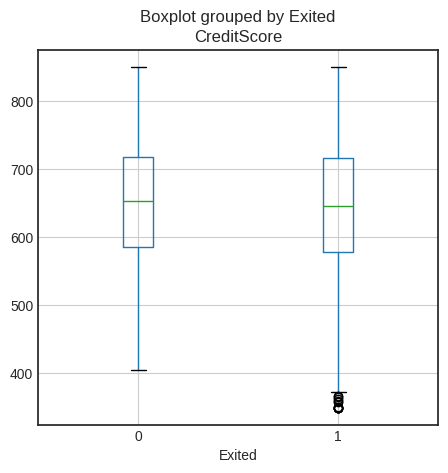

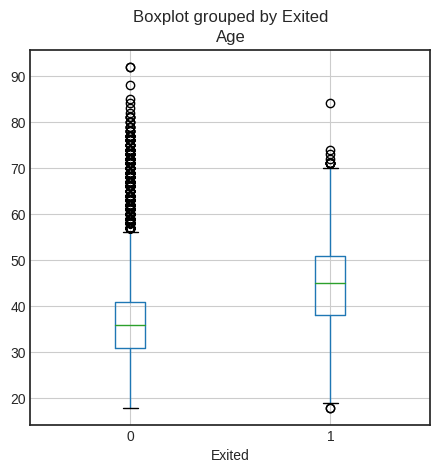

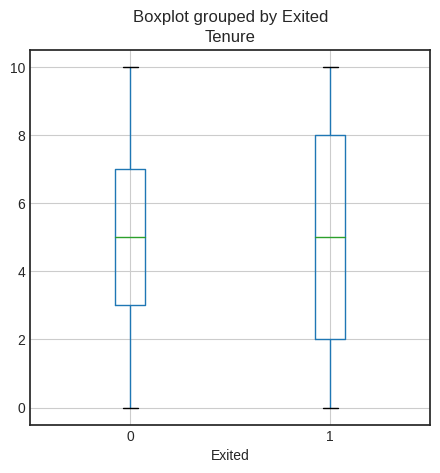

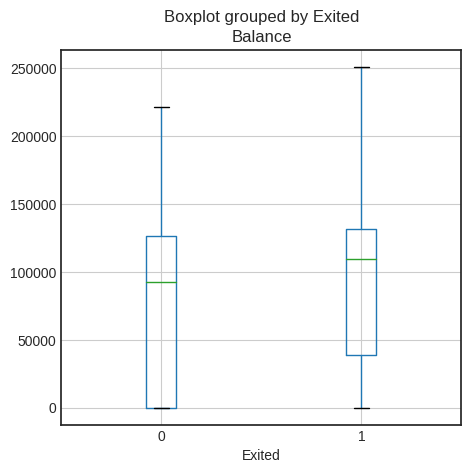

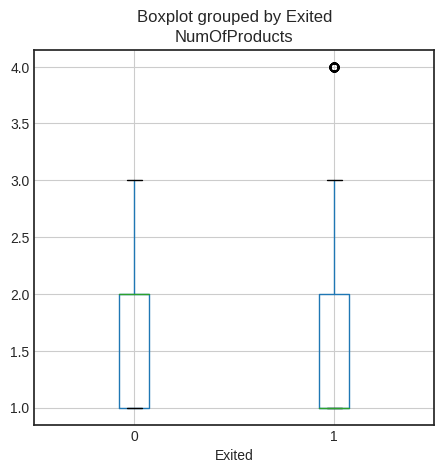

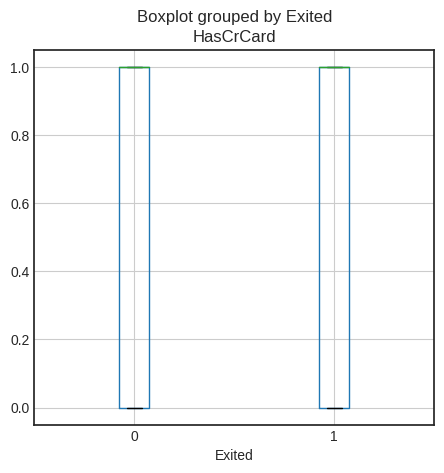

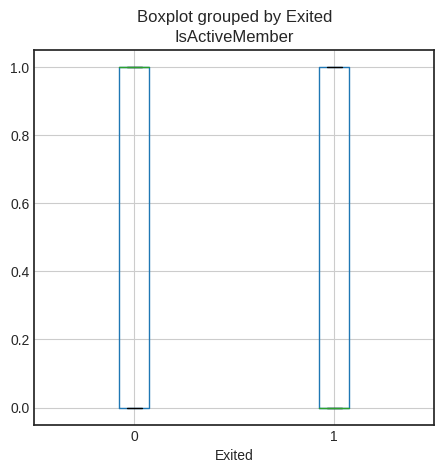

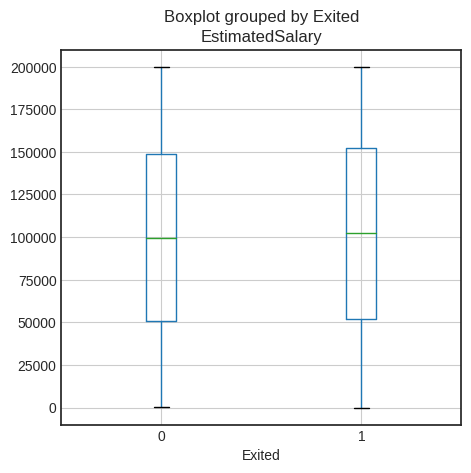

In [305]:
for i in df.columns.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender','Exited']):
    boxplot = df.boxplot(column=i, by = 'Exited',figsize=(5,5))

# Histogram   </font>


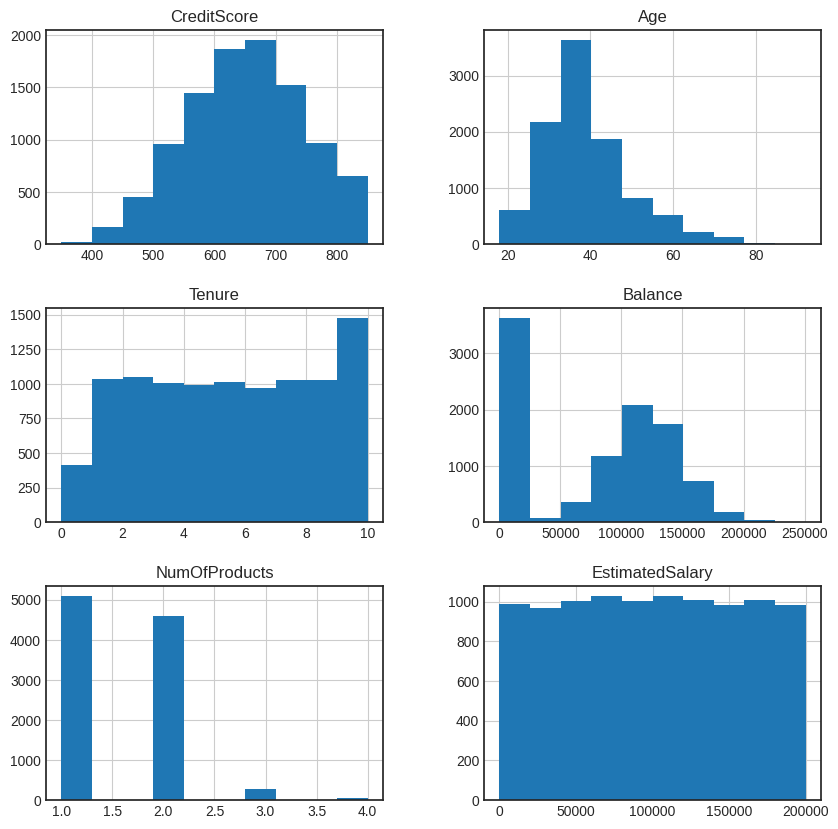

In [306]:
df.hist(column=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'], figsize=(10,10))
plt.show()

# Correlation Matrix heatmap

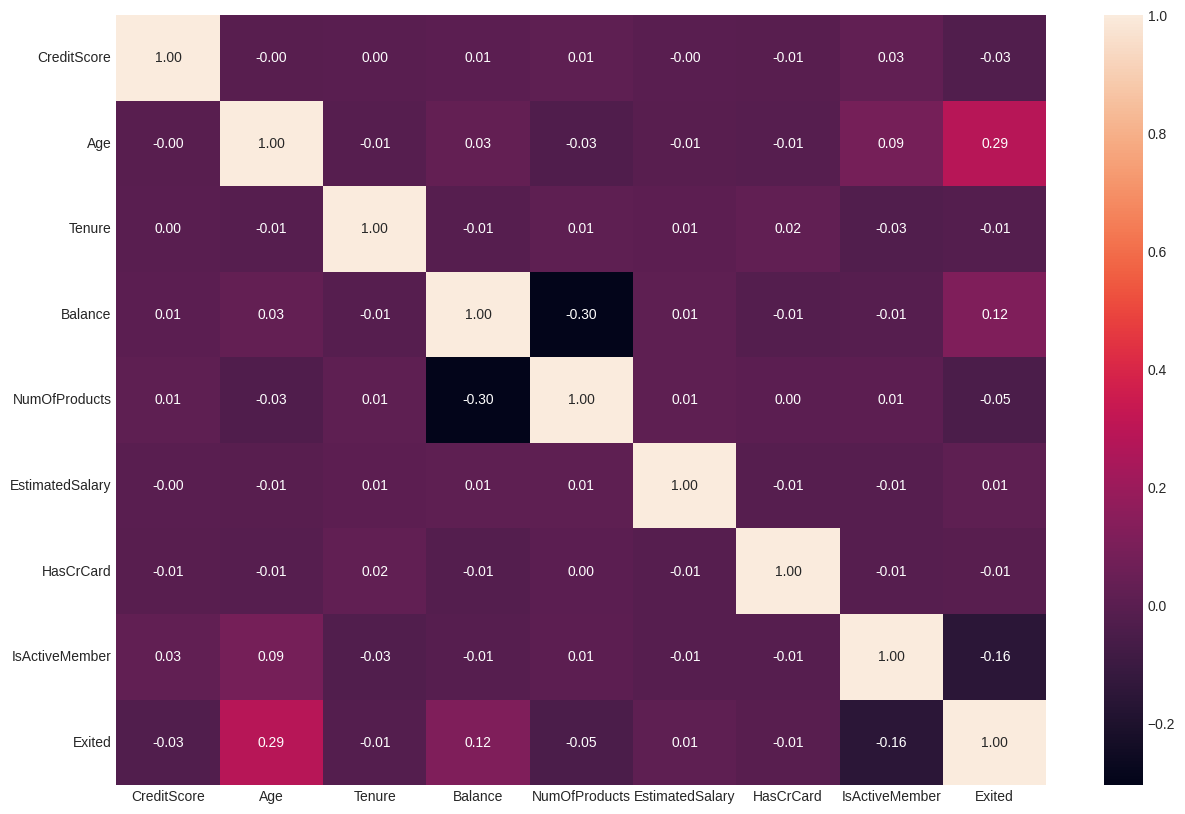

In [307]:
list1 = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Exited']
plt.figure(figsize=(15,10))
sns.heatmap(df[list1].corr(), annot=True, fmt=".2f")
plt.show()

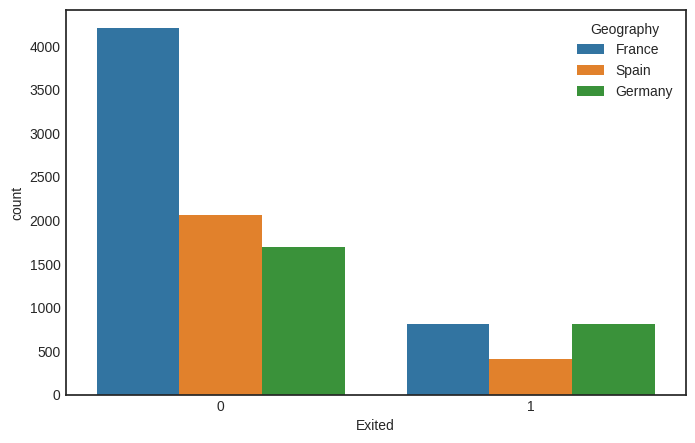

In [308]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='Geography', data=df)
plt.show()

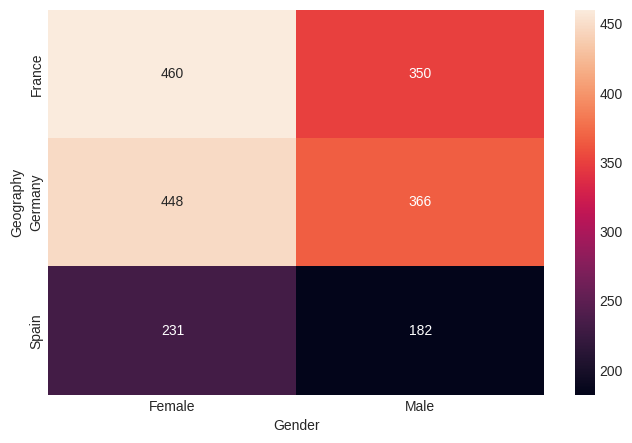

In [309]:
plt.figure(figsize=(8, 5))
crosstab = pd.crosstab(df['Geography'], df['Gender'], values=df['Exited'], aggfunc=np.sum)
sns.heatmap(crosstab, annot=True, fmt='d')
plt.show()

### Preprocessing & Feature Engineering

In [310]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [311]:
for i in range(len(df)):
    if df['EstimatedSalary'][i]<= 50000:
        df['EstimatedSalary'][i]= 'Poor'
    elif 50000 < df['EstimatedSalary'][i]<= 100000:
        df['EstimatedSalary'][i]= 'Good'
    elif 100000 < df['EstimatedSalary'][i]<= 200000:
        df['EstimatedSalary'][i]= 'Excellent'
    else:
        df['EstimatedSalary'][i]= "Top"

<ipython-input-311-f91b2aab9968>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimatedSalary'][i]= 'Excellent'


In [312]:
for i in range(len(df)):
    if df['Balance'][i]<= 25000:
        df['Balance'][i]= 'Poor'
    elif 25000 < df['Balance'][i]<= 100000:
        df['Balance'][i]= 'Good'
    elif 100000 < df['Balance'][i]<= 200000:
        df['Balance'][i]= 'Excellent'
    else:
        df['Balance'][i]= "Top"

<ipython-input-312-71ee8dca9bc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balance'][i]= 'Poor'


In [313]:
df['Gender'],df['Geography'],df['Balance'],df['EstimatedSalary']=df['Gender'].astype('category'),df['Geography'].astype('category'),df['Balance'].astype('category'),df['EstimatedSalary'].astype('category')
df['Gender']=df.Gender.cat.codes
df['Geography']=df.Geography.cat.codes
df['Balance']=df.Balance.cat.codes
df['EstimatedSalary']=df.EstimatedSalary.cat.codes


In [314]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['CreditScore'] = scaler.fit_transform(df[['CreditScore']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  int8   
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  int8   
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), int8(4)
memory usage: 586.1 KB


In [316]:
df

CreditScore  Geography  Gender       Age  Tenure  Balance  \
0       -0.326221          0       0  0.293517       2        2   
1       -0.440036          2       0  0.198164       1        1   
2       -1.536794          0       0  0.293517       8        0   
3        0.501521          0       0  0.007457       1        2   
4        2.063884          2       0  0.388871       2        0   
...           ...        ...     ...       ...     ...      ...   
9995     1.246488          0       1  0.007457       5        2   
9996    -1.391939          0       1 -0.373958      10        1   
9997     0.604988          0       0 -0.278604       7        2   
9998     1.256835          1       1  0.293517       3        1   
9999     1.463771          0       0 -1.041433       4        0   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1                0       1  
1                 1          0               1                0       0  
2                 3          1               0                0       1  
3                 2          0               0                1       0  
4                 1          1               1                1       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0                1       0  
9996              1          1               1                0       0  
9997              1          0               1                2       1  
9998              2          1               0                1       1  
9999              1          1               0                2       0  

[10000 rows x 11 columns]

from matplotlib import pyplot as plt
df['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Geography'].plot(kind='hist', bins=20, title='Geography')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CreditScore', y='Geography', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Geography', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Gender', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['CreditScore'].plot(kind='line', figsize=(8, 4), title='CreditScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Geography'].plot(kind='line', figsize=(8, 4), title='Geography')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [317]:
predictors = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
dependent_variable_name = ['Exited']

In [318]:
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X = scale(X)
X = pd.DataFrame(X)
X.head()

0         1         2         3         4         5         6  \
0 -0.326221 -0.901886 -1.095988  0.293517 -1.041760  1.207651 -0.911583   
1 -0.440036  1.515067 -1.095988  0.198164 -1.387538  0.117123 -0.911583   
2 -1.536794 -0.901886 -1.095988  0.293517  1.032908 -0.973405  2.527057   
3  0.501521 -0.901886 -1.095988  0.007457 -1.387538  1.207651  0.807737   
4  2.063884  1.515067 -1.095988  0.388871 -1.041760 -0.973405 -0.911583   

          7         8         9  
0  0.646092  0.970243 -0.901988  
1 -1.547768  0.970243 -0.901988  
2  0.646092 -1.030670 -0.901988  
3 -1.547768 -1.030670  0.309873  
4  0.646092  0.970243  0.309873

from matplotlib import pyplot as plt
_df_136[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_137[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_138[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_139[4].plot(kind='hist', bins=20, title=4)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_140.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_141.plot(kind='scatter', x=1, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_142.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_143.plot(kind='scatter', x=4, y=5, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[2]
  ys = series[0]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_144.sort_values(2, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(2)
_ = plt.ylabel(0)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[2]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_145.sort_values(2, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(2)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[2]
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_146.sort_values(2, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(2)
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[2]
  ys = series[4]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_147.sort_values(2, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(2)
_ = plt.ylabel(4)

from matplotlib import pyplot as plt
_df_148[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_149[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_150[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_151[4].plot(kind='line', figsize=(8, 4), title=4)
plt.gca().spines[['top', 'right']].set_visible(False)

In [319]:
Y = df[['Exited']]
Y

Exited
0          1
1          0
2          1
3          0
4          0
...      ...
9995       0
9996       0
9997       1
9998       1
9999       0

[10000 rows x 1 columns]

from matplotlib import pyplot as plt
Y['Exited'].plot(kind='hist', bins=20, title='Exited')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Y['Exited'].plot(kind='line', figsize=(8, 4), title='Exited')
plt.gca().spines[['top', 'right']].set_visible(False)

In [320]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [321]:
from imblearn.under_sampling import RandomUnderSampler

In [322]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X, Y)

In [323]:
y_train_rus.value_counts()

Exited
0         2037
1         2037
dtype: int64

### Decision Tree

In [324]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 8000
The number of records in the test dataset is 2000


In [326]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter

In [375]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 10, max_depth =8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=10)

In [376]:
y_predic = clf.predict(X_test)
y_predic

array([0, 0, 0, ..., 0, 0, 0])

In [377]:
print("Accuracy of this model is:", accuracy_score(y_test, y_predic))

Accuracy of this model is: 0.8543333333333333


In [378]:
sco = accuracy_score(y_test, y_predic)*100

In [379]:
print("This model is", sco, "accurate, that is in acceptable " )

This model is 85.43333333333332 accurate, that is in acceptable 


In [380]:
print(classification_report(y_test, y_predic))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.76      0.37      0.49       584

    accuracy                           0.85      3000
   macro avg       0.81      0.67      0.70      3000
weighted avg       0.84      0.85      0.83      3000



In [333]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import graphviz
import pydot
from IPython.display import Image, display

In [334]:
feature_importances = clf.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

Importance
Age                0.405212
NumOfProducts      0.274261
IsActiveMember     0.087260
Balance            0.074301
CreditScore        0.059542
Geography          0.050179
Tenure             0.027691
Gender             0.013433
EstimatedSalary    0.007337
HasCrCard          0.000784

from matplotlib import pyplot as plt
_df_152['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_153['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [335]:
feature_importances_list = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

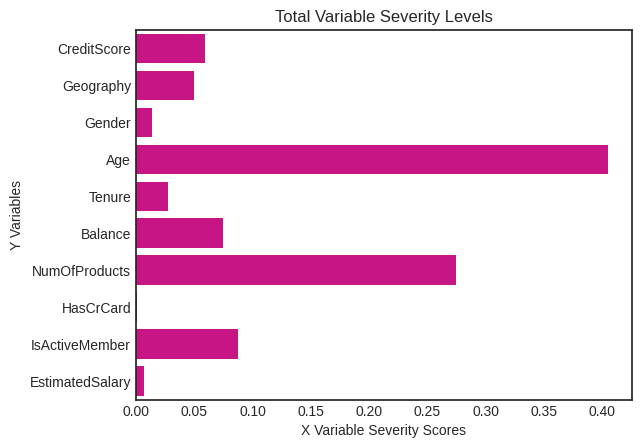

In [336]:
sns.barplot(x = feature_importances, y = feature_importances_list, color='mediumvioletred', saturation=1)
plt.xlabel('X Variable Severity Scores')
plt.ylabel('Y Variables')
plt.title('Total Variable Severity Levels')
plt.show()

In [337]:
### Random Forest

In [371]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=20)
RF.fit(X_train,y_train)

<ipython-input-371-55805171086b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


RandomForestClassifier(n_estimators=20)

In [372]:
y_pred=RF.predict(X_test)

In [374]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.8596666666666667


In [341]:
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import confusion_matrix, classification_report

In [342]:
confusion_matrix(y_test, y_pred)

array([[1535,   53],
       [ 235,  177]])

In [343]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1588
           1       0.77      0.43      0.55       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [344]:
feature_importances = RF.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

Importance
Age                0.292226
CreditScore        0.217497
NumOfProducts      0.139071
Tenure             0.118034
Balance            0.048196
EstimatedSalary    0.047185
Geography          0.045219
IsActiveMember     0.043010
HasCrCard          0.026290
Gender             0.023274

In [345]:
feature_importances_list = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

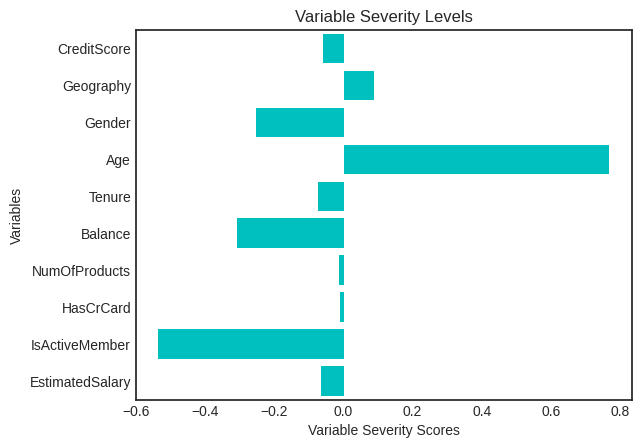

In [381]:
sns.barplot(x = feature_importances, y = feature_importances_list, color='c', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

#### logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', max_iter=50)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=50, solver='liblinear')

In [383]:
y_log_pred = log_model.predict(X_test)
y_log_pred.shape[0]

3000

In [384]:
print(y_log_pred)

[0 0 0 ... 0 0 0]


In [385]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [386]:
f1_score(y_test,y_log_pred)

0.27792207792207796

In [387]:
accuracy_score(y_test,y_log_pred)

0.8146666666666667

In [388]:
precision_score(y_test,y_log_pred)

0.5752688172043011

In [389]:
recall_score(y_test,y_log_pred)

0.1832191780821918

In [390]:
print(classification_report(y_test,y_log_pred))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.58      0.18      0.28       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



In [356]:
feature_importances = log_model.coef_[0]
pd.DataFrame(data=feature_importances, index=predictors,
             columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

Importance
Age                0.769734
Geography          0.089293
HasCrCard         -0.009336
NumOfProducts     -0.014012
CreditScore       -0.060049
EstimatedSalary   -0.063915
Tenure            -0.073599
Gender            -0.253883
Balance           -0.308575
IsActiveMember    -0.535988

from matplotlib import pyplot as plt
_df_154['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_155['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [391]:
feature_importances_list = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

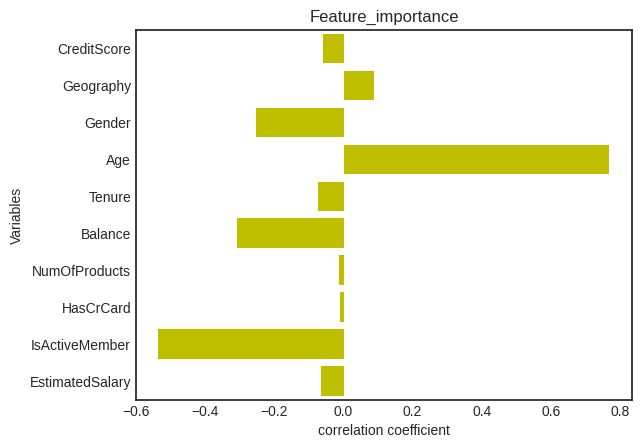

In [393]:
sns.barplot(x = feature_importances, y = feature_importances_list, color='y', saturation=10)
plt.xlabel('correlation coefficient')
plt.ylabel('Variables')
plt.title('Feature_importance')
plt.show()

### KNN

In [394]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=8)

In [395]:
KNN.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [396]:
y_pred=KNN.predict(X_test)

In [397]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.838


In [398]:
confusion_matrix(y_test, y_pred)

array([[2345,   71],
       [ 415,  169]])

In [399]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2416
           1       0.70      0.29      0.41       584

    accuracy                           0.84      3000
   macro avg       0.78      0.63      0.66      3000
weighted avg       0.82      0.84      0.81      3000



In [365]:
### Voting

In [400]:
from sklearn.ensemble import  VotingClassifier
Classifier = VotingClassifier(estimators=[
('DT', clf), ('RF', RF),('LogReg',log_model),('KNN',KNN)],voting='soft',flatten_transform=True)
eclf1 = Classifier.fit(X_train , y_train)
print(Classifier.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.8623333333333333


In [367]:
y_pred=Classifier.predict(X_test)



**Hard** and soft voting score



In [402]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
													Y,
													test_size = 0.30,
													random_state = 4)

# group / ensemble of models
estimator = []
estimator.append(('LR',
				LogisticRegression(solver ='lbfgs',
									multi_class ='multinomial',
									max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)

# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Hard Voting Score  0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Soft Voting Score  0


In [403]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2416
           1       0.68      0.46      0.55       584

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-406-cc7550c66c2b>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

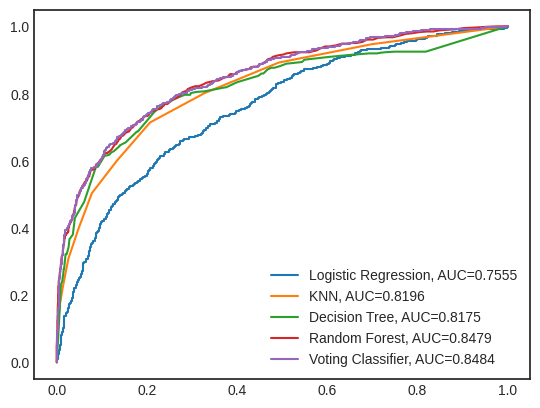

In [406]:
np.random.seed(10)

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit KNN model and plot ROC curve
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 200, max_depth =8)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
model = RandomForestClassifier(n_estimators=400)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit Voting Classifier model and plot ROC curve
model = VotingClassifier(estimators=[
('DT', clf), ('RF', RF),('LogReg',log_model),('KNN',KNN)],voting='soft',flatten_transform=True)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Voting Classifier, AUC="+str(auc))

#add legend
plt.legend()